<a href="https://colab.research.google.com/github/bdugick89/Data-Science-Bootcamp/blob/main/Titanic_Survival_Prediction_Using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classification to Predict Titanic Survival

**Deep Dive Coding Data Science Bootcamp Sample Project**

---
Kyla Bendt - November 20, 2020



## Problem Definition

The goal is to take passenger information based on ticket records for the Titanic and predict whether or not a passenger would have survived.  This is a binary classification problem since each passenger either survived or didn't survive.  This project will use Naive Bayes classification.  

## Data Collection/Sources

### Data Overview

This data comes from [Kaggle](https://www.kaggle.com/c/titanic/data).

The Titanic dataset is a classic used for intro data science projects. It includes ticketing information for each passenger and an entry identifying whether or not they survived.

There are 10 fields for each passenger such as:
- whether or not they survived
- ticket class
- name
- gender
- age
- ticket price

The training portion has 891 entries.  There are an unequal number of survived/didn't survive records.  (342 survived & 549 didn't survive)

### Imports

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

### File Paths

File paths for train and test data.

In [ ]:
base_path = 'http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Example/Data/'
train_path = base_path + 'Titanic.train.csv'
test_path = base_path + 'Titanic.test.csv'

### Load Data

Here we will load the data into a DataFrame and just take a look at the first few rows to make sure everything looks good.

In [ ]:
train_orig = pd.read_csv(train_path)
train_orig.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_orig.shape

(891, 12)

We can see that our data successfully loaded.  Now we can go on to the next step.  


## Data Cleaning

Next we'll look at the last few rows of the data just to double check that everything looks good.

In [ ]:
train_orig.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Looks good.  :)

### Drop Columns

First, we'll drop a couple of columns that don't look useful.  
PassengerId is just an ID number assigned by counting up.  This won't help our model so we'll drop this column.
The passenger's name isn't going to help our predictions so we'll drop the name column too.  

In [ ]:
train = train_orig.copy()
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.drop('PassengerId', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)

Next, let's take a look at the ticket column and try to see if it will be useful. The data dictionary says that this will be the ticket number and it might not be helpful but we'll double check what is in there.

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

By looking at the unique ticket numbers we can see that they won't be helpful so we'll drop this column.


In [ ]:
train.drop('Ticket', axis=1, inplace=True)

Let's check and make sure the columns are gone.

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Mission accomplished!

### Check for null values

We can see from the first few rows that there are NaNs in Cabin.  Let's see how many total NaNs we have.

In [ ]:
train.isna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


In [ ]:
train.isna().sum().sum()

866

866 null values is a lot.  Let's see what we can do about them. First we need to know what columns have null values.  

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
sums = train.isna().sum()
sums

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
sums > 0

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [ ]:
sums[sums > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

Since there are 891 entries, the columns that have 891 non-nulls are good to go.  We need to do something about the other columns though.  These include:
- Age
- Cabin
- Embarked

Age has almost 200 empty entries.  This is not ideal, but we'd really like to keep this column because it seems like it could have an impact on survival.  People might let an elderly person on a lifeboat first, or a baby might not be able to get themself on the lifeboat.  

We'll fill the null entries with the average age of the other passengers.  

In [ ]:
# Save the avg_age as a variable to reuse when cleaning
# test data
age_avg = train['Age'].mean()
train['Age'].fillna(age_avg, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
sums = train.isna().sum()
sums[sums > 0]

Cabin       687
Embarked      2
dtype: int64

Cabin only has 204 values.  Let's examine it a little more to figure out what we want to do with it.  

In [ ]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We can see that there are a lot of different cabins and each one just has a few passengers.  It's also very likely that our test set will have passengers in different cabins than those listed here.  One-hot encoding is not going to work here.   

Instead we'll change this to a binary - 0 for no cabin listed and 1 for cabin listed.  

In [ ]:
train_bak = train.copy()

In [ ]:
# Restore from backup
train = train_bak.copy()


In [ ]:
# Set those without a cabin ( i.e. null values ) to 0
train['Cabin'].fillna(0, inplace=True)


In [ ]:
# mask of those with a cabin
mask = ( train['Cabin'] != 0 )
mask

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Cabin, Length: 891, dtype: bool

In [ ]:
# Count of those with a cabin
mask.sum()

204

In [ ]:
# Set those with a cabin to 0
train['Cabin'][mask]=1

# Check that it worked
train['Cabin'].value_counts()

<ipython-input-28-791517806004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cabin'][mask]=1


0    687
1    204
Name: Cabin, dtype: int64

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
#change "Cabin" so that it's no longer an object datatype
train['Cabin'] = train['Cabin'].astype('int32')
train['Cabin'].dtype

dtype('int32')

In [ ]:
sums = train.isna().sum()
sums[sums > 0]

Embarked    2
dtype: int64

Our last column with null values is embarked.  From the [data dictionary on Kaggle]( https://www.kaggle.com/c/titanic/data#:~:text=should%20look%20like.-,Data%20Dictionary,-Variable ), we see that embarked is the port of embarkment.
- C = Cherbourg
- Q = Queenstown
- S = Southampton

We'll fill this column with the most common port of embarkment.

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# mode() returns a series even when there is only one value
# so we need [0] to pull the first value
embarked_mode = train['Embarked'].mode()[0]
train['Embarked'].fillna(value=embarked_mode, inplace=True)

# check that we got what we wanted
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [ ]:
sums = train.isna().sum()
sums[sums > 0]

Series([], dtype: int64)

### Check target values

Since the survived column holds our target values, it's a good idea just to check and make sure that all of these values are valid.  

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

We can see that everything is a zero or a one which is good.  We do notice from this that our data is not balanced.  342 people survived versus 549 who didn't.  This means our dataset is biased.

### One-hot encoding

There are still a few columns we need to look at.  Pclass is 1, 2 or 3 but this is the ticket class - it's not a numeric value so we will one-hot encode this.  The port of embarkment also needs one-hot encoded and we need to change the sex column from male or female to 0 or 1.

In [ ]:
train = pd.get_dummies(
    train,
    columns = ["Sex","Pclass","Embarked"],
    prefix=["Sex","Class","Port"]
)

In [ ]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Class_1,Class_2,Class_3,Port_C,Port_Q,Port_S
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1


Now Sex_male and Sex_female are redundant so we'll drop one of them.

In [ ]:
train.drop('Sex_male', axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Sex_female,Class_1,Class_2,Class_3,Port_C,Port_Q,Port_S
0,0,22.0,1,0,7.2500,0,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,1,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,0,0,1,0,0,1


Everything looks good now!

### Data Cleaning Function

To make it easy to clean our test data later, we'll combine all of the data cleaning we did into a single clean function so it is easy to rerun later.

In [ ]:
def clean_data(dataframe, age_avg, embarked_mode):
  """This will take a test data set and clean it to
  match what we did to our training set.

  Parameters
  ----------
  df: is a dataframe with the test data.
  avg_age: the fill value to use for the null age values
           (should be the same as used for the training set)
  embarked_mode: this is the most common port of embarkment
  """
  df = dataframe.copy()
  # Drop columns that we don't need
  df.drop('PassengerId', axis=1, inplace=True)
  df.drop('Name', axis=1, inplace=True)
  df.drop('Ticket', axis=1, inplace=True)

  # Fill NAs
  df['Age'].fillna(avg_age, inplace=True)
  df['Cabin'].fillna(0, inplace=True)
  df['Cabin'][df['Cabin']!=0]=1
  df['Embarked'].fillna(embarked_mode, inplace=True)

  # Change dtypes
  df['Cabin'] = df['Cabin'].astype('int32')

  #One-hot encode
  df = pd.get_dummies(
      df,
      columns = ["Sex","Pclass","Embarked"],
      prefix=["Sex","Class","Port"],
      )
  #Drop extra column
  df.drop('Sex_male', axis=1, inplace=True)


## Exploratory Data Analysis

### Feature Correlation

Let's just take a quick visual look at what our feature correlations are.  

We expect the ports and classes to have negative correlations because a passenger has only one port and one class.

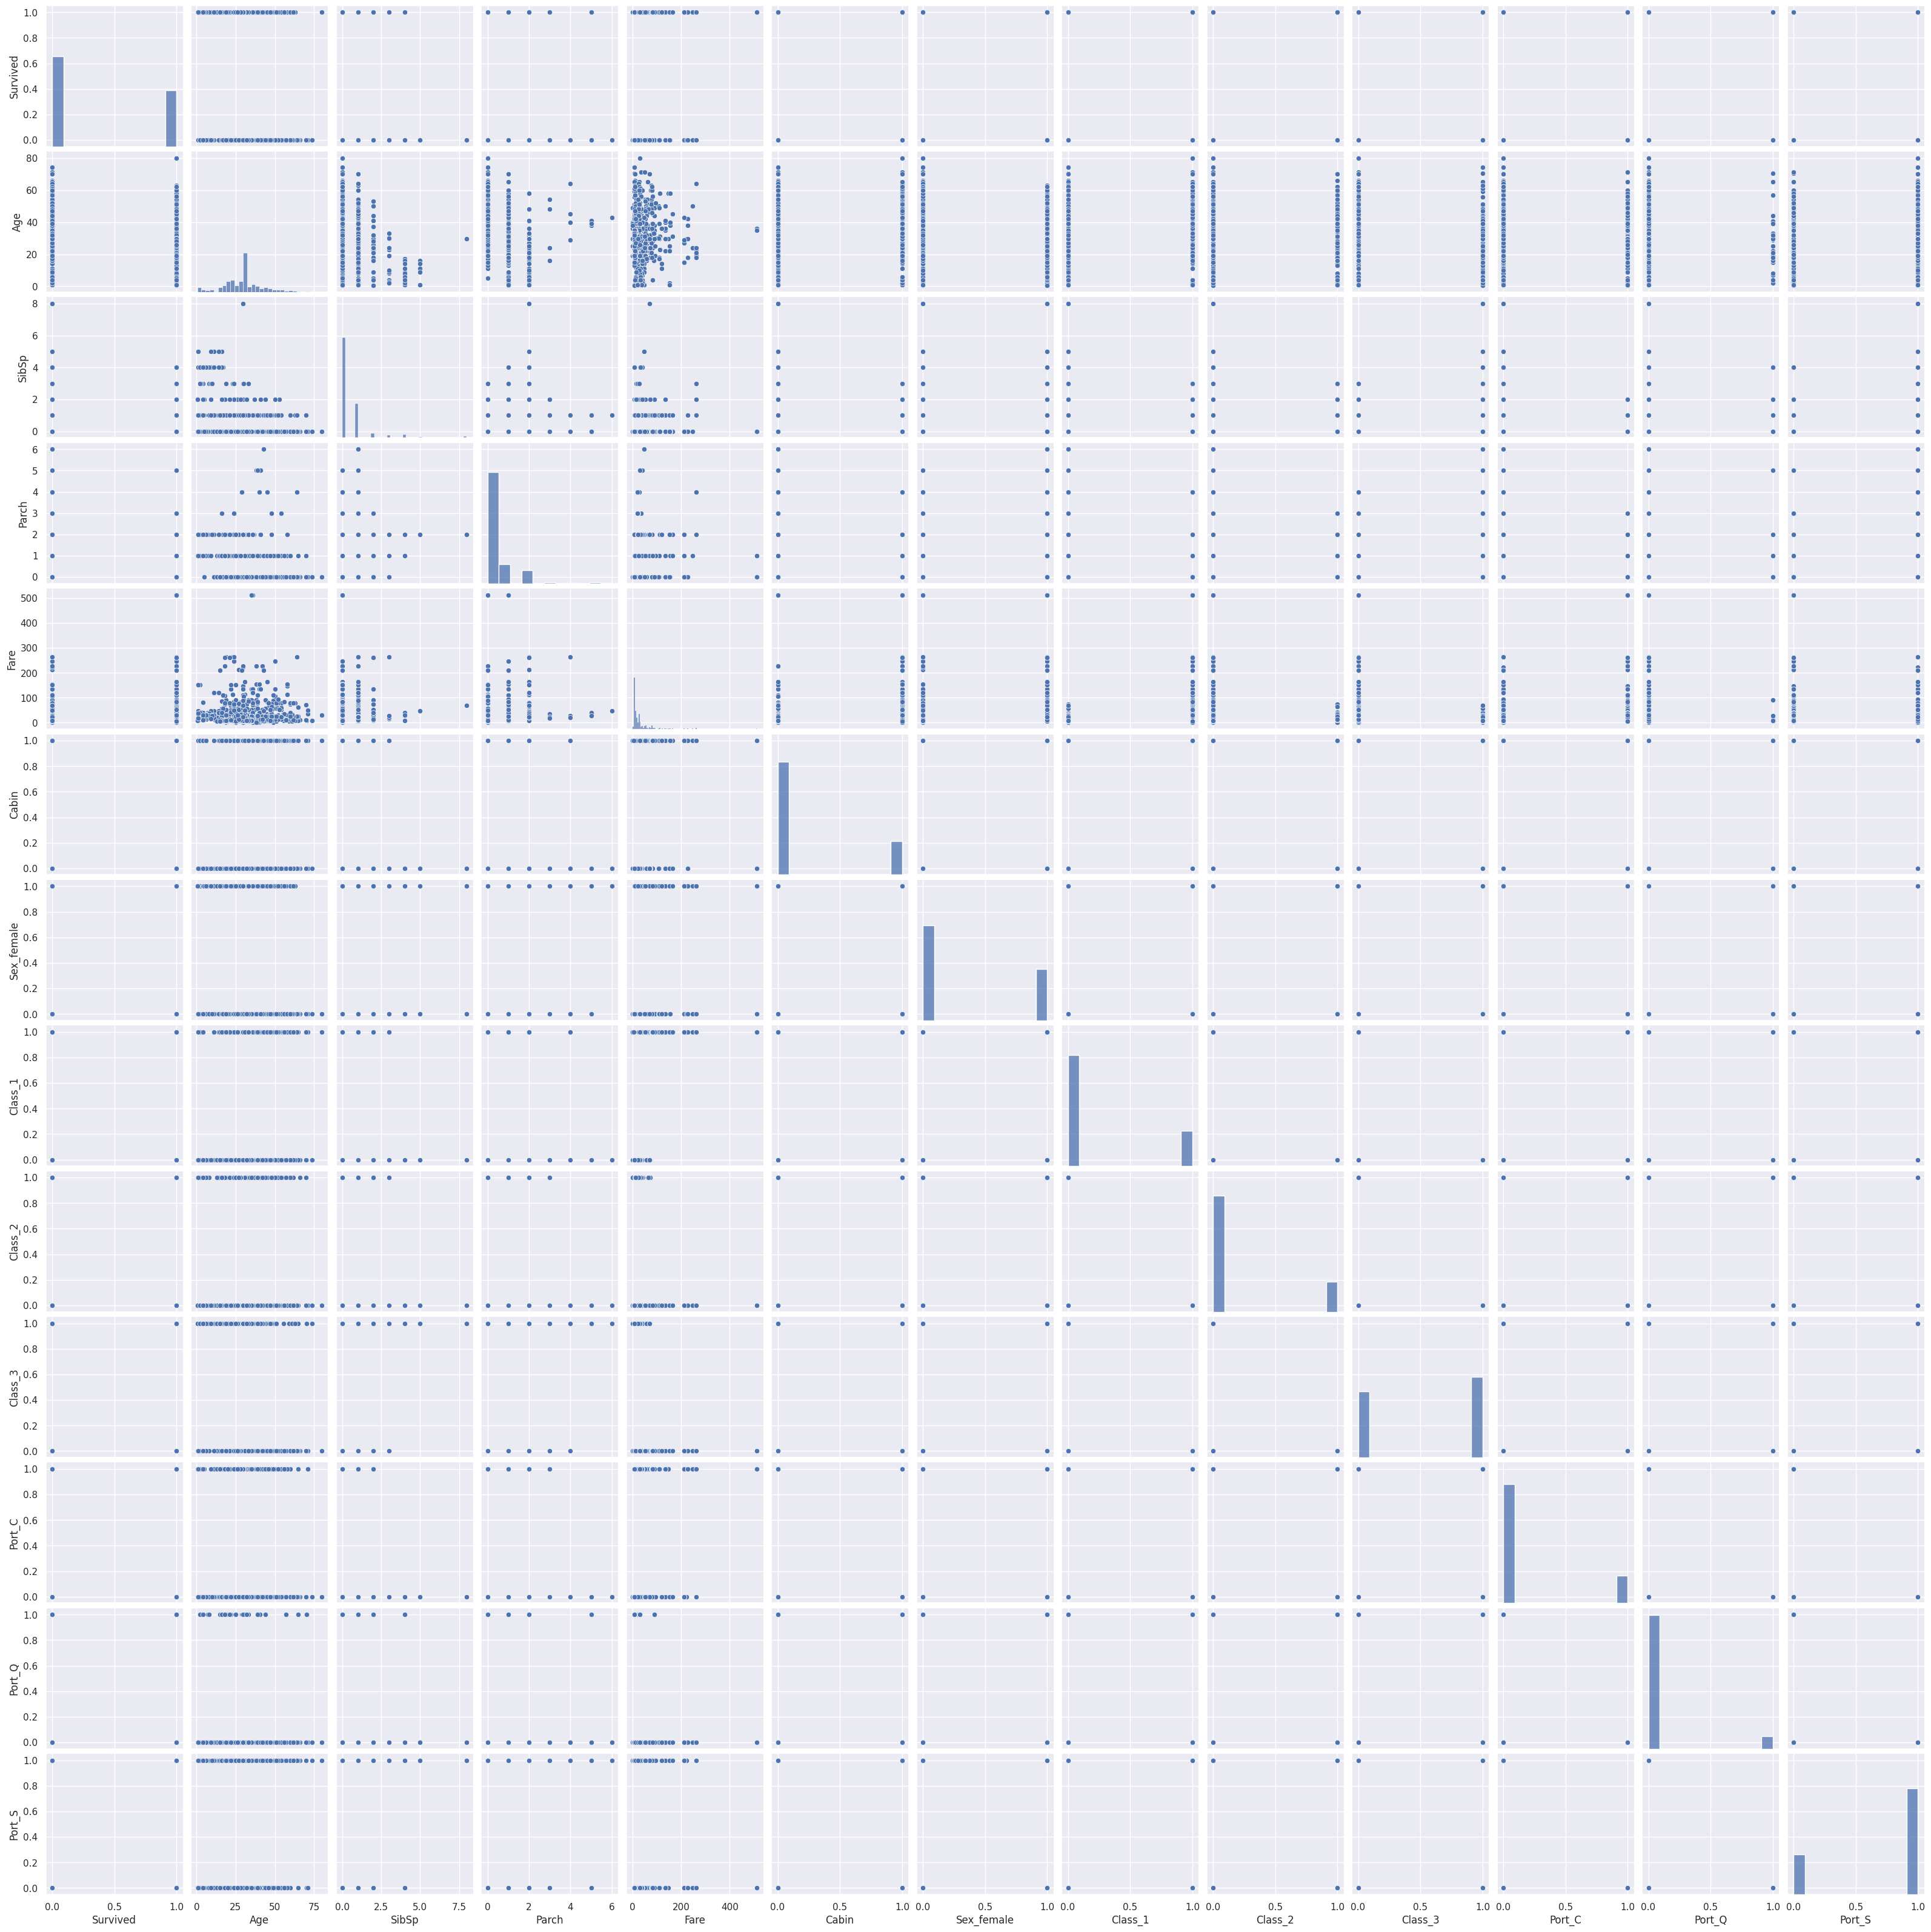

In [ ]:
sns.set()
sns.pairplot(train) ;

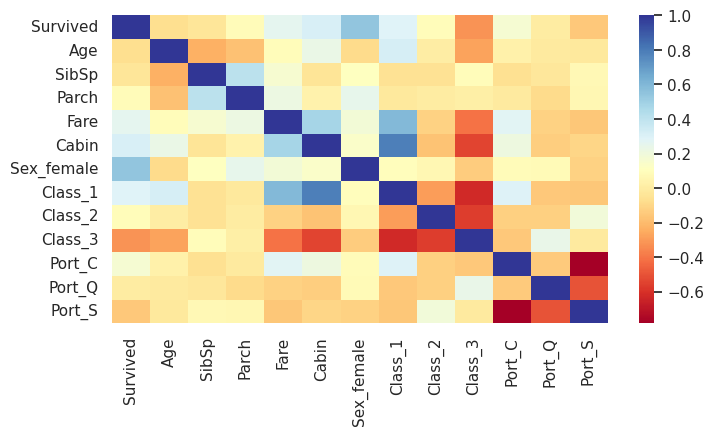

In [ ]:
corr = train.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='RdYlBu',annot = False );

When looking specifically at the features that correlate to the survival, Sex_female and Class_3 stick out. We'll also look specifically at the values for these.

In [ ]:
corr_unstacked = corr.unstack()
corr_unstacked

Survived  Survived    1.000000
          Age        -0.069809
          SibSp      -0.035322
          Parch       0.081629
          Fare        0.257307
                        ...   
Port_S    Class_2     0.189980
          Class_3    -0.015104
          Port_C     -0.782742
          Port_Q     -0.499421
          Port_S      1.000000
Length: 169, dtype: float64

In [ ]:
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self


Survived  Age       -0.069809
          SibSp     -0.035322
          Parch      0.081629
          Fare       0.257307
          Cabin      0.316912
                       ...   
Port_S    Class_1   -0.161921
          Class_2    0.189980
          Class_3   -0.015104
          Port_C    -0.782742
          Port_Q    -0.499421
Length: 156, dtype: float64

In [ ]:
# Because negative correlation could also be of interest, we will take the absolute value, `abs()`.
corr_unstacked_not_self['Survived'].abs().sort_values(ascending = False)


Sex_female    0.543351
Class_3       0.322308
Cabin         0.316912
Class_1       0.285904
Fare          0.257307
Port_C        0.168240
Port_S        0.149683
Class_2       0.093349
Parch         0.081629
Age           0.069809
SibSp         0.035322
Port_Q        0.003650
dtype: float64

Next, let's look at which pairs of features are most correlated.  Because negative correlation could also be of interest, we will take the absolute value, `abs()`.

In [ ]:
corr_pair = corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
corr_pair

Class_1   Cabin       0.788773
Cabin     Class_1     0.788773
Port_S    Port_C      0.782742
Port_C    Port_S      0.782742
Class_3   Class_1     0.626738
                        ...   
Class_2   Age         0.006589
Port_Q    Survived    0.003650
Survived  Port_Q      0.003650
Parch     Class_2     0.000734
Class_2   Parch       0.000734
Length: 156, dtype: float64

In [ ]:
corr_pair[::2].head(20)

Class_1     Cabin       0.788773
Port_S      Port_C      0.782742
Class_3     Class_1     0.626738
Fare        Class_1     0.591711
Class_3     Class_2     0.565210
Sex_female  Survived    0.543351
Class_3     Cabin       0.539291
Port_Q      Port_S      0.499421
Cabin       Fare        0.482075
Parch       SibSp       0.414838
Fare        Class_3     0.413333
Class_3     Survived    0.322308
Age         Class_1     0.319916
Survived    Cabin       0.316912
Port_C      Class_1     0.296423
Class_1     Class_2     0.288585
Survived    Class_1     0.285904
Class_3     Age         0.281004
Fare        Port_C      0.269335
            Survived    0.257307
dtype: float64

We see that:
- First class is closely correlated to passengers that have a cabin and also to fare.
- Females are more likely to survive.
- Those that travel with siblings or spouses are more likely to also have parents or children on board (families travel together).
- Having a cabin or being in first class is also correlated with survival.

In [ ]:
# An alternative method for finding the most highly correlated features
corr = train.corr().abs()
corr = corr.melt(
    ignore_index = False,
    var_name = 'feature',
    value_name = 'correlation',
    )
corr = corr[corr['correlation'] != 1]
corr.sort_values(
    'correlation',
    inplace=True,
    ascending=False,
    )
corr[::2].head(5)

,feature,correlation
Cabin,Class_1,0.788773
Port_C,Port_S,0.782742
Class_1,Class_3,0.626738
Class_1,Fare,0.591711
Class_2,Class_3,0.565210


*It's important to note that Naive Bayes assumes that features are not correlated with each other.  Here we have several features which ARE highly correlated.  We will use Naive Bayes anyway and just see how it does.  However, it may not be the best model for this data set.*

### Overall Average Survival

Let's look at overall survival so that we have a baseline to see if certain features improved or worsened this.

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
sum(train['Survived'])*100/len(train['Survived'])

38.38383838383838

Overall, 549 people died and 342 people survived.  This is about a 38% survival rate.  

Sex, Cabin and Class were the most correlated survival so let's take a closer look at those.

### Survival by sex


In [ ]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Sex_female,Class_1,Class_2,Class_3,Port_C,Port_Q,Port_S
0,0,22.0,1,0,7.2500,0,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,1,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,0,0,1,0,0,1


Let's see how sex affected survival.

In [ ]:
for i, sex in zip([0,1], ['Male', 'Female']):
  all = train[train['Sex_female']==i]['Survived']
  survived = sum(all)
  total = len(all)
  rate = survived*100/total
  print("%s Percent survival: %d \n Total survived: %d. Total count: %d. \n" % (sex, rate, survived, total))

Male Percent survival: 18 
 Total survived: 109. Total count: 577. 

Female Percent survival: 74 
 Total survived: 233. Total count: 314. 



Here we can see that only 18% of men survived but 74% of women did.

### Survival by port, class and cabin status

Let's see how class, port and cabin status affected survival rates.

In [ ]:
for field in ['Class_1', 'Class_2', 'Class_3', 'Port_C', 'Port_Q', 'Port_S', 'Cabin']:
  all = train[train[field]==1]['Survived']
  survived = sum(all)
  total = len(all)
  rate = survived*100/total
  print("%s Percent survival: %d \n Total survived: %d. Total count: %d. \n" % (field, rate, survived, total))

Class_1 Percent survival: 62 
 Total survived: 136. Total count: 216. 

Class_2 Percent survival: 47 
 Total survived: 87. Total count: 184. 

Class_3 Percent survival: 24 
 Total survived: 119. Total count: 491. 

Port_C Percent survival: 55 
 Total survived: 93. Total count: 168. 

Port_Q Percent survival: 38 
 Total survived: 30. Total count: 77. 

Port_S Percent survival: 33 
 Total survived: 219. Total count: 646. 

Cabin Percent survival: 66 
 Total survived: 136. Total count: 204. 



We can see that first class had the best survival rate and third class had the worst.

Port C had a higher survival rate than the other ports.  

Passengers with cabins also had a higher survival rate.


## Data Processing

### Gaussian Naive Bayes Model


Create the GNB model.

In [126]:
gnb = GaussianNB()

Next we'll separate our features and targets.

In [133]:
y = train['Survived'].copy()
X = train.drop('Survived', axis=1, inplace=False)

Then we'll train the model and see how it does.

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 179 points : 33


Let's take a closer look at the results here.  

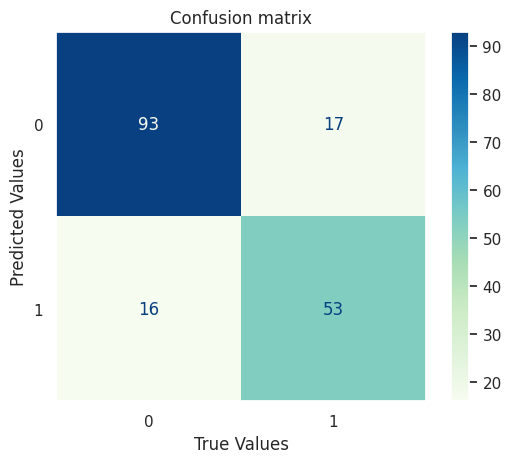

In [129]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='GnBu',
)
plt.grid(False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title('Confusion matrix') ;
# plt.savefig('confusion_matrix.png')

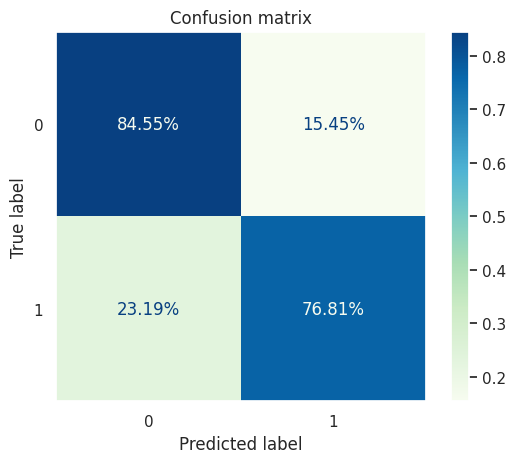

In [130]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

We can see that our model performs better if the person did not survive than if they lived.  This is because our input data is biased with more people not surviving.  

### Cross-Validation

Next, we'll perform cross validation to see what our average accuracy is. First we'll create a function for cross-validation.

In [131]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

Then we'll run our function.

In [132]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.76291


We're seeing about 76% accuracy.

## Data Visualization

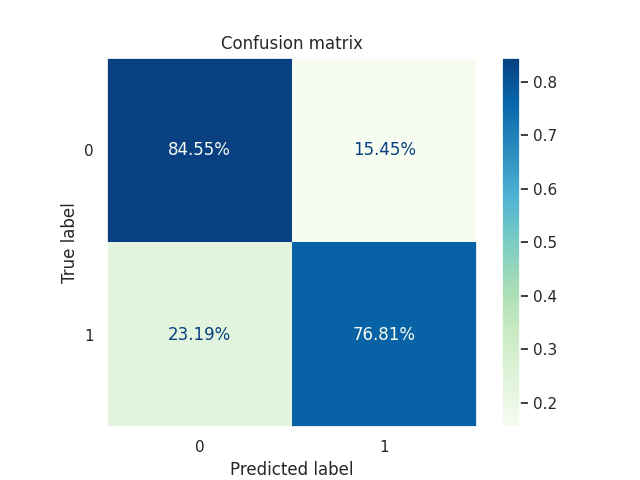

In [ ]:
Image('confusion_matrix.png')

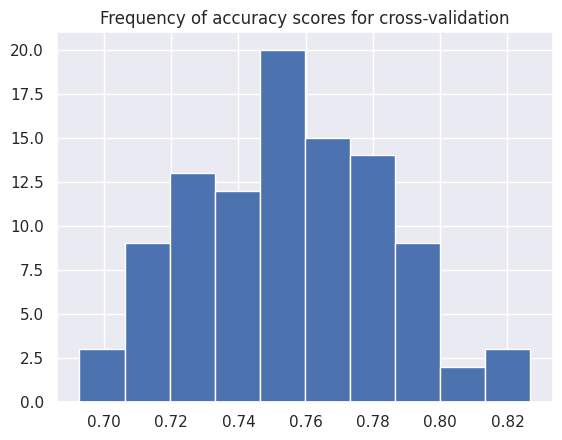

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

We can see that we have a decent average accuracy.  There is a bit of a spread between the best and worst performming runs when looking at our cross-validation results.  This is probably due to the overall small number of passengers.

## Conclusion

### Important features

We saw that sex was the most important factor in determining who survived.  The other most important factors were class and cabin status(which was closely linked to class).

### Model performance

- Using Naive Bayes resulted in an average accuracy of 76% in our cross-validation tests.
- Several of our features are correlated with each other so this may not be an ideal method to use.
- Our model did better at predicting when passengers did not survive than when they did due to there being fewer survivers in the training set.

### Future exploration/ Next steps

- It would be worth exploring alternative models like a random forest and see how that did compared to Naive Bayes.  
- Further feature engineering may also be helpful such as seeing if the cabin and first class features are correlated enough that it would make sense to combine them into one feature.
- Create a balanced data set by removing some of the casualties to create a model that predicts survival and non-survival with equal accuracy.